# Sales Prediction Using Python

In [1]:
#importing necessary libraries with filter warning 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", message="X does not have valid feature names")


### Data Preprocessing And Model Implementation 

In [2]:
# Loading dataset
df = pd.read_csv('dataset/advertising.xls')

df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Show columns of dataset
print(df.columns)


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [4]:

# Prepare features and target variable
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target

In [14]:
# Split the data into training and testing sets.
# X_train, y_train will be used to train the model, and X_test, y_test will be used to evaluate its performance.
# The test_size=0.2 means 20% of the data will be used for testing, while 80% will be used for training.
# random_state=42 ensures reproducibility by fixing the seed for the random number generator.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create an instance of the Linear Regression model
# Train the model using the training data (X_train, y_train)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Model Evaluation 

In [7]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


### Optimal Advertising Budget Allocation

In [15]:
def objective_function(ad_expenditures):
    # Reshape the input advertising expenditures to match the expected input shape for the model
    ad_expenditures = np.array(ad_expenditures).reshape(1, -1)
    
    # Use the trained model to predict sales based on the given advertising expenditures
    predicted_sales = model.predict(ad_expenditures)
    
    # Return the negative of the predicted sales because optimization functions typically minimize, 
    # and we want to maximize sales
    return -predicted_sales


In [9]:
# Initial guess for expenditure (e.g., $1000 for each channel)
initial_expenditures = [1000, 1000, 1000]  # TV, Radio, Newspaper
bounds = [(0, None), (0, None), (0, None)]  # Expenditures should be non-negative

# Perform optimization
result = minimize(objective_function, x0=initial_expenditures, bounds=bounds)

optimal_expenditures = result.x
print(f'Optimal Advertising Expenditures:\nTV: ${optimal_expenditures[0]:.2f}\nRadio: ${optimal_expenditures[1]:.2f}\nNewspaper: ${optimal_expenditures[2]:.2f}')


Optimal Advertising Expenditures:
TV: $19509855.00
Radio: $36129714.90
Newspaper: $1553326.25


### Model Predictions and Advertising Impact Visualization

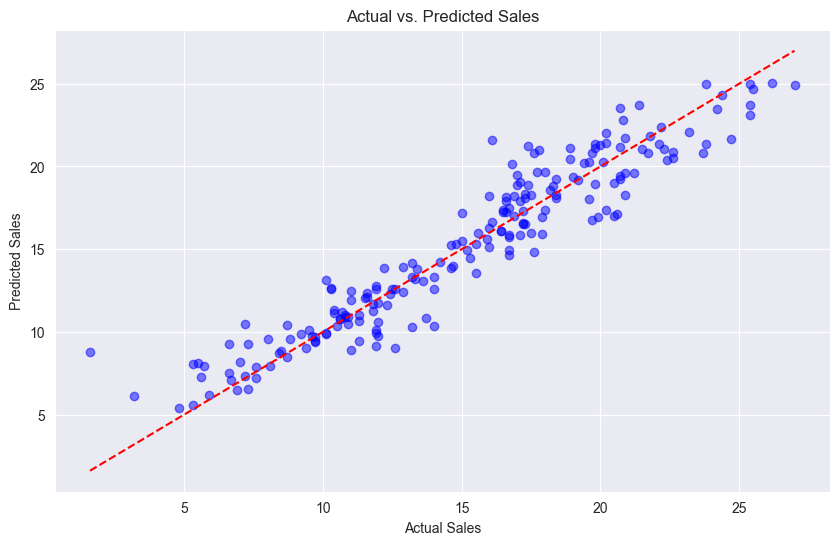

In [16]:
import matplotlib.pyplot as plt

# Predict sales for the entire dataset using the trained model
y_all_pred = model.predict(X)

# Create a figure for plotting the actual sales vs. predicted sales
plt.figure(figsize=(10, 6))

# Plot a scatter plot of actual sales (y) versus predicted sales (y_all_pred)
plt.scatter(y, y_all_pred, color='blue', alpha=0.5)

# Plot a diagonal line (y = x) to represent perfect predictions (where actual = predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Label the axes for clarity
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Set the title of the plot
plt.title('Actual vs. Predicted Sales')

# Display the plot
plt.show()


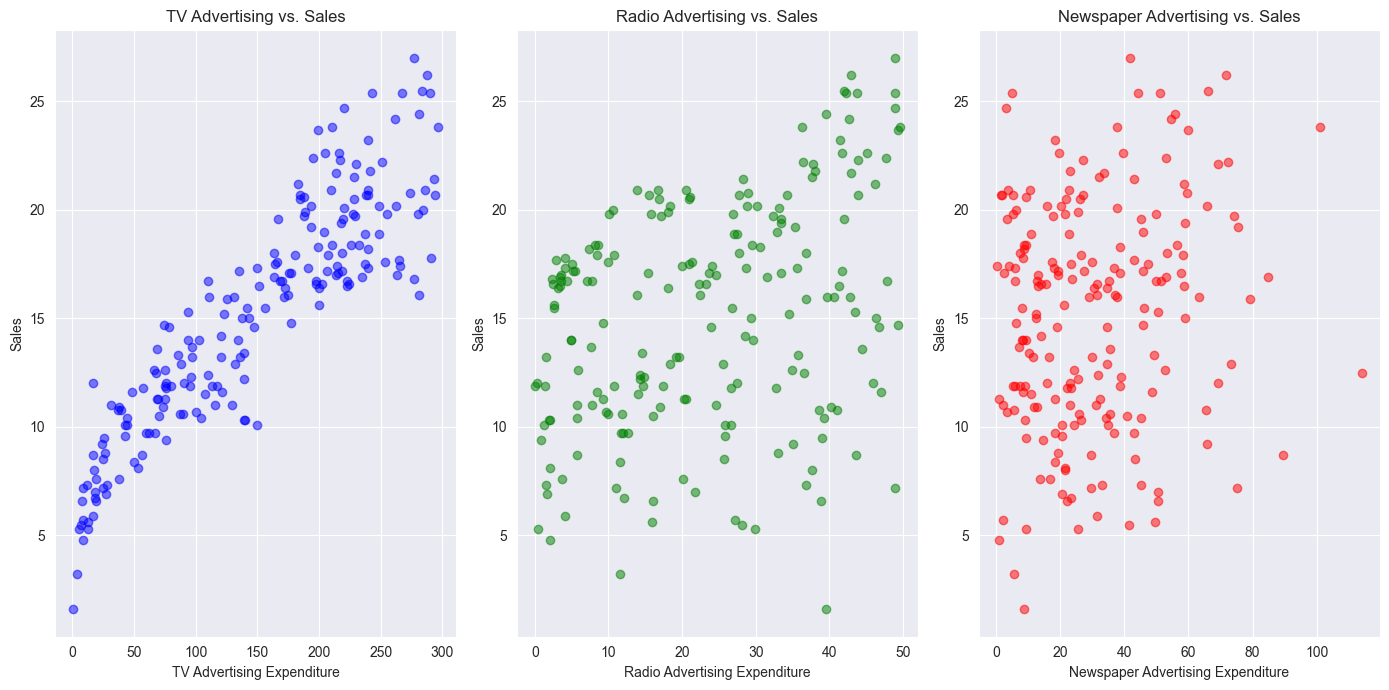

In [17]:
# Create a figure with a specified size for plotting the subplots
plt.figure(figsize=(14, 7))

# First subplot: Scatter plot of TV Advertising Expenditure vs. Sales
plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], color='blue', alpha=0.5)
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('TV Advertising vs. Sales')

# Second subplot: Scatter plot of Radio Advertising Expenditure vs. Sales
plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'], color='green', alpha=0.5)
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Radio Advertising vs. Sales')

# Third subplot: Scatter plot of Newspaper Advertising Expenditure vs. Sales
plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'], color='red', alpha=0.5)
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Newspaper Advertising vs. Sales')

# Adjust layout to ensure subplots don't overlap and display the plot
plt.tight_layout()
plt.show()


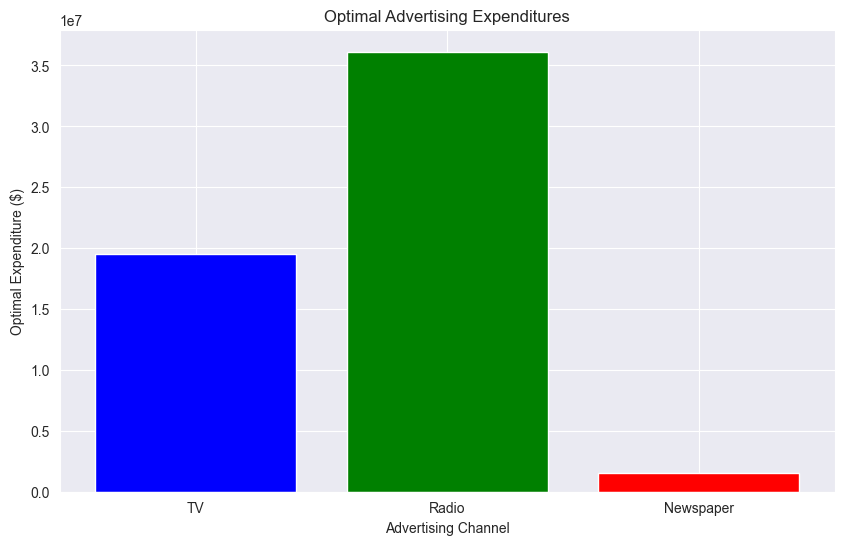

In [18]:
# Select the optimal advertising expenditures for TV, Radio, and Newspaper

optimal_expenditures = [optimal_expenditures[0], optimal_expenditures[1], optimal_expenditures[2]]

# Create a bar plot to visualize the optimal advertising expenditures across different channels
plt.figure(figsize=(10, 6))
plt.bar(['TV', 'Radio', 'Newspaper'], optimal_expenditures, color=['blue', 'green', 'red'])
plt.xlabel('Advertising Channel')          # Label the x-axis
plt.ylabel('Optimal Expenditure ($)')      # Label the y-axis
plt.title('Optimal Advertising Expenditures')  # Title the plot
plt.show()                                # Display the plot
